In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_excel('Orgz_Analytics_Data.xlsx')

In [78]:
df.head(5)

Tenure_Range       Date  Empl Id                                Location  \
0  10-15 years 2022-01-31       20  Jacksonville, FL - 301 West Bay Street   
1  15-20 Years 2022-01-31       23                  Charlotte, NC - 8600 D   
2  15-20 Years 2022-01-31       27         New York, NY - 730 Third Avenue   
3  10-15 years 2022-01-31       31                  Charlotte, NC - 8500 B   
4  20-25 Years 2022-01-31       32  Jacksonville, FL - 301 West Bay Street   

  Location Code              Work Country     Work City Work State  \
0       FL-301W  United States of America  Jacksonville         FL   
1       NC-860D  United States of America     Charlotte         NC   
2       NY-730T  United States of America      New York         NY   
3       NC-850B  United States of America     Charlotte         NC   
4       FL-301W  United States of America  Jacksonville         FL   

                       Job Title                       Business Title  ...  \
0          Accounting Management                   Accounting Manager  ...   
1     Institutional Case Manager                   Inst. Case Manager  ...   
2    Head, Fixed Income Quant PM          Head, Fixed Income Quant PM  ...   
3       Sr Investment Accountant             Sr Investment Accountant  ...   
4  Bus Support Relationship Spec  Business Banking Support Specialist  ...   

  Service Date Tenure Time in Role                      Marital Status  \
0   2010-07-06  11.57         0.69  Married (United States of America)   
1   2005-07-28  16.51         0.77   Single (United States of America)   
2   2004-06-07  17.65         0.69  Married (United States of America)   
3   2011-02-02  11.00         1.08  Married (United States of America)   
4   2001-04-23  20.77         0.54  Married (United States of America)   

     Generation  Reporting Level  \
0  Generation X                6   
1  Generation X                6   
2  Generation X                6   
3  Generation Y                7   
4  Generation X                9   

   Assignment Category (or Full Time/Part Time)   Age Current rating  Term  
0                                     Full time  52.0            4.0    No  
1                                     Full time  43.0            3.0    No  
2                                     Full time  52.0            3.0    No  
3                                     Full time  40.0            4.0    No  
4                                     Full time  45.0            3.0    No  

[5 rows x 24 columns]

In [79]:
df.dtypes

Tenure_Range                                            object
Date                                            datetime64[ns]
Empl Id                                                  int64
Location                                                object
Location Code                                           object
Work Country                                            object
Work City                                               object
Work State                                              object
Job Title                                               object
Business Title                                          object
Individual Contributor / People Leader                  object
Job Family                                              object
Client Facing                                           object
Current Hire Date                               datetime64[ns]
Service Date                                    datetime64[ns]
Tenure                                                 

In [80]:
## Check for unique values
df['Assignment Category (or Full Time/Part Time)'].unique()

array(['Full time', 'Part time'], dtype=object)

'Assignment catergory is binary column,contains 'Full time' and 'Part time' hence we can change or label encoder

In [81]:
df['Current rating'].unique()

array([ 4.,  3., nan,  5.,  2.,  1.])

Contain 4,3,5,2,1 and some of the values are nan so we can bfill/ffil and then change the datatype to int.

In [82]:
df['Current rating'] = df['Current rating'].ffill()
df['Current rating'] = df['Current rating'].astype(int)
df['Individual Contributor / People Leader'].unique()
df['Service Date'] = df['Service Date'].astype('datetime64[ns]')
cols = ['Work City', 'Work State', 'Marital Status', 'Client Facing',
        'Individual Contributor / People Leader', 'Job Family', 'Generation']

for col in cols:
    df[col] = df[col].fillna('0')

# Fill NaN values in datetime columns with a specific date (e.g., '1970-01-01')
datetime_cols = ['Service Date']
for col in datetime_cols:
    df[col] = df[col].fillna(pd.to_datetime('1970-01-01'))

In [83]:
df.isnull().sum()

Tenure_Range                                       0
Date                                               0
Empl Id                                            0
Location                                           0
Location Code                                      0
Work Country                                       0
Work City                                          0
Work State                                         0
Job Title                                          0
Business Title                                     0
Individual Contributor / People Leader             0
Job Family                                         0
Client Facing                                      0
Current Hire Date                                  0
Service Date                                       0
Tenure                                             0
Time in Role                                       0
Marital Status                                     0
Generation                                    

It seams that many of the Emp have not disclosed the Age hence we can fill it by mean but before that we need to check for the outliers

<Axes: ylabel='Age'>

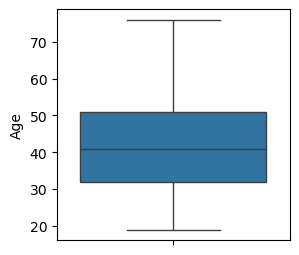

In [84]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Age'],orient='v')

Here are no outlier hence we can fill it with mean value

In [85]:
df['Age']=df['Age'].fillna(round(df['Age'].mean(),0))
df['Age']=df['Age'].astype(int)

In [86]:
df.isnull().sum()

Tenure_Range                                    0
Date                                            0
Empl Id                                         0
Location                                        0
Location Code                                   0
Work Country                                    0
Work City                                       0
Work State                                      0
Job Title                                       0
Business Title                                  0
Individual Contributor / People Leader          0
Job Family                                      0
Client Facing                                   0
Current Hire Date                               0
Service Date                                    0
Tenure                                          0
Time in Role                                    0
Marital Status                                  0
Generation                                      0
Reporting Level                                 0


In [87]:
df['Work Country'].unique()

array(['United States of America', 'United Kingdom', 'India', 'Singapore',
       'Austria', 'Germany', 'France', 'Spain', 'China', 'Luxembourg',
       'Japan', 'Hong Kong', 'Australia', 'Poland', 'Uruguay', 'Brazil',
       'Chile', 'Colombia', 'Denmark', 'Romania', 'Italy', 'Sweden',
       'Finland', 'Korea, Republic of', 'Canada', 'Argentina',
       'Philippines', 'Portugal', 'Netherlands'], dtype=object)

In [88]:
df['Tenure_Range']=df['Tenure_Range'].str.split(' ').apply(lambda X:X[0])

In [89]:
df['Marital Status'].unique()

array(['Married (United States of America)',
       'Single (United States of America)',
       'Divorced (United States of America)',
       'Domestic partnership (United States of America)',
       'Common-Law (United States of America)',
       'Widowed (United States of America)',
       'Legally Separated (United States of America)',
       'Single (United Kingdom)', 'Single (India)', 'Married (India)',
       'Single (Singapore)', 0,
       'Married/Civil Partnership (United Kingdom)', 'Married (Austria)',
       'Married (Singapore)', 'Married (Germany)', 'Divorced (France)',
       'Single (Spain)', 'Single (Luxembourg)', 'Pacsed (France)',
       'Married (Japan)', 'Divorced (Germany)', 'Single (Germany)',
       'Single (Hong Kong)', 'Married (Australia)', 'Single (France)',
       'Married (Luxembourg)', 'Single (Japan)',
       'Divorced (United Kingdom)', 'Single (Poland)', 'Single (Uruguay)',
       'Married (Poland)', 'Married (Colombia)', 'Married (Hong Kong)',
       '

In [90]:
##removing unnecessary text from Marital Status column
df['Marital Status']=df['Marital Status'].str.partition("(").iloc[:,0]
df['Marital Status'] = np.where(df['Marital Status'].isnull(), '0', df['Marital Status'])


Since i had already given the NUll value in column 'Marital Status' as '0' so when i do the partition it will still 
give the null value hence i explictly give the value to the place where the value is null as '0'

In [91]:
df['Marital Status'].value_counts()

Marital Status
Married                                23086
Single                                 13241
0                                       7881
Divorced                                1872
Married/Civil Partnership                383
Domestic partnership                     175
Widowed                                  175
Cohabiting                                40
Common-Law                                25
Not Married, Single, Never Married        21
Separated                                 20
Legally Separated                         18
Unmarried                                 13
Civil Partnership                          7
Pacsed                                     4
Widow                                      4
Common Law                                 4
Cohabit                                    3
Name: count, dtype: int64

In [92]:
df_copy=df.copy()
## Copy the data for future visual representation

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_col=['Tenure_Range', 'Location', 'Location Code',
       'Work Country', 'Work City', 'Work State', 'Job Title',
       'Business Title', 'Individual Contributor / People Leader',
       'Job Family', 'Client Facing', 'Marital Status', 'Generation',
       'Assignment Category (or Full Time/Part Time)',
       'Term']
for col in label_col:
    df[col]=label_encoder.fit_transform(df[col])

### For Term column 
- 0 represent those who haven't leave the firm/company yet
- 1 represent those who have already leaved the company
***
### For marital status
- 0 represent Full time category
- 1 represent part time category

<Axes: >

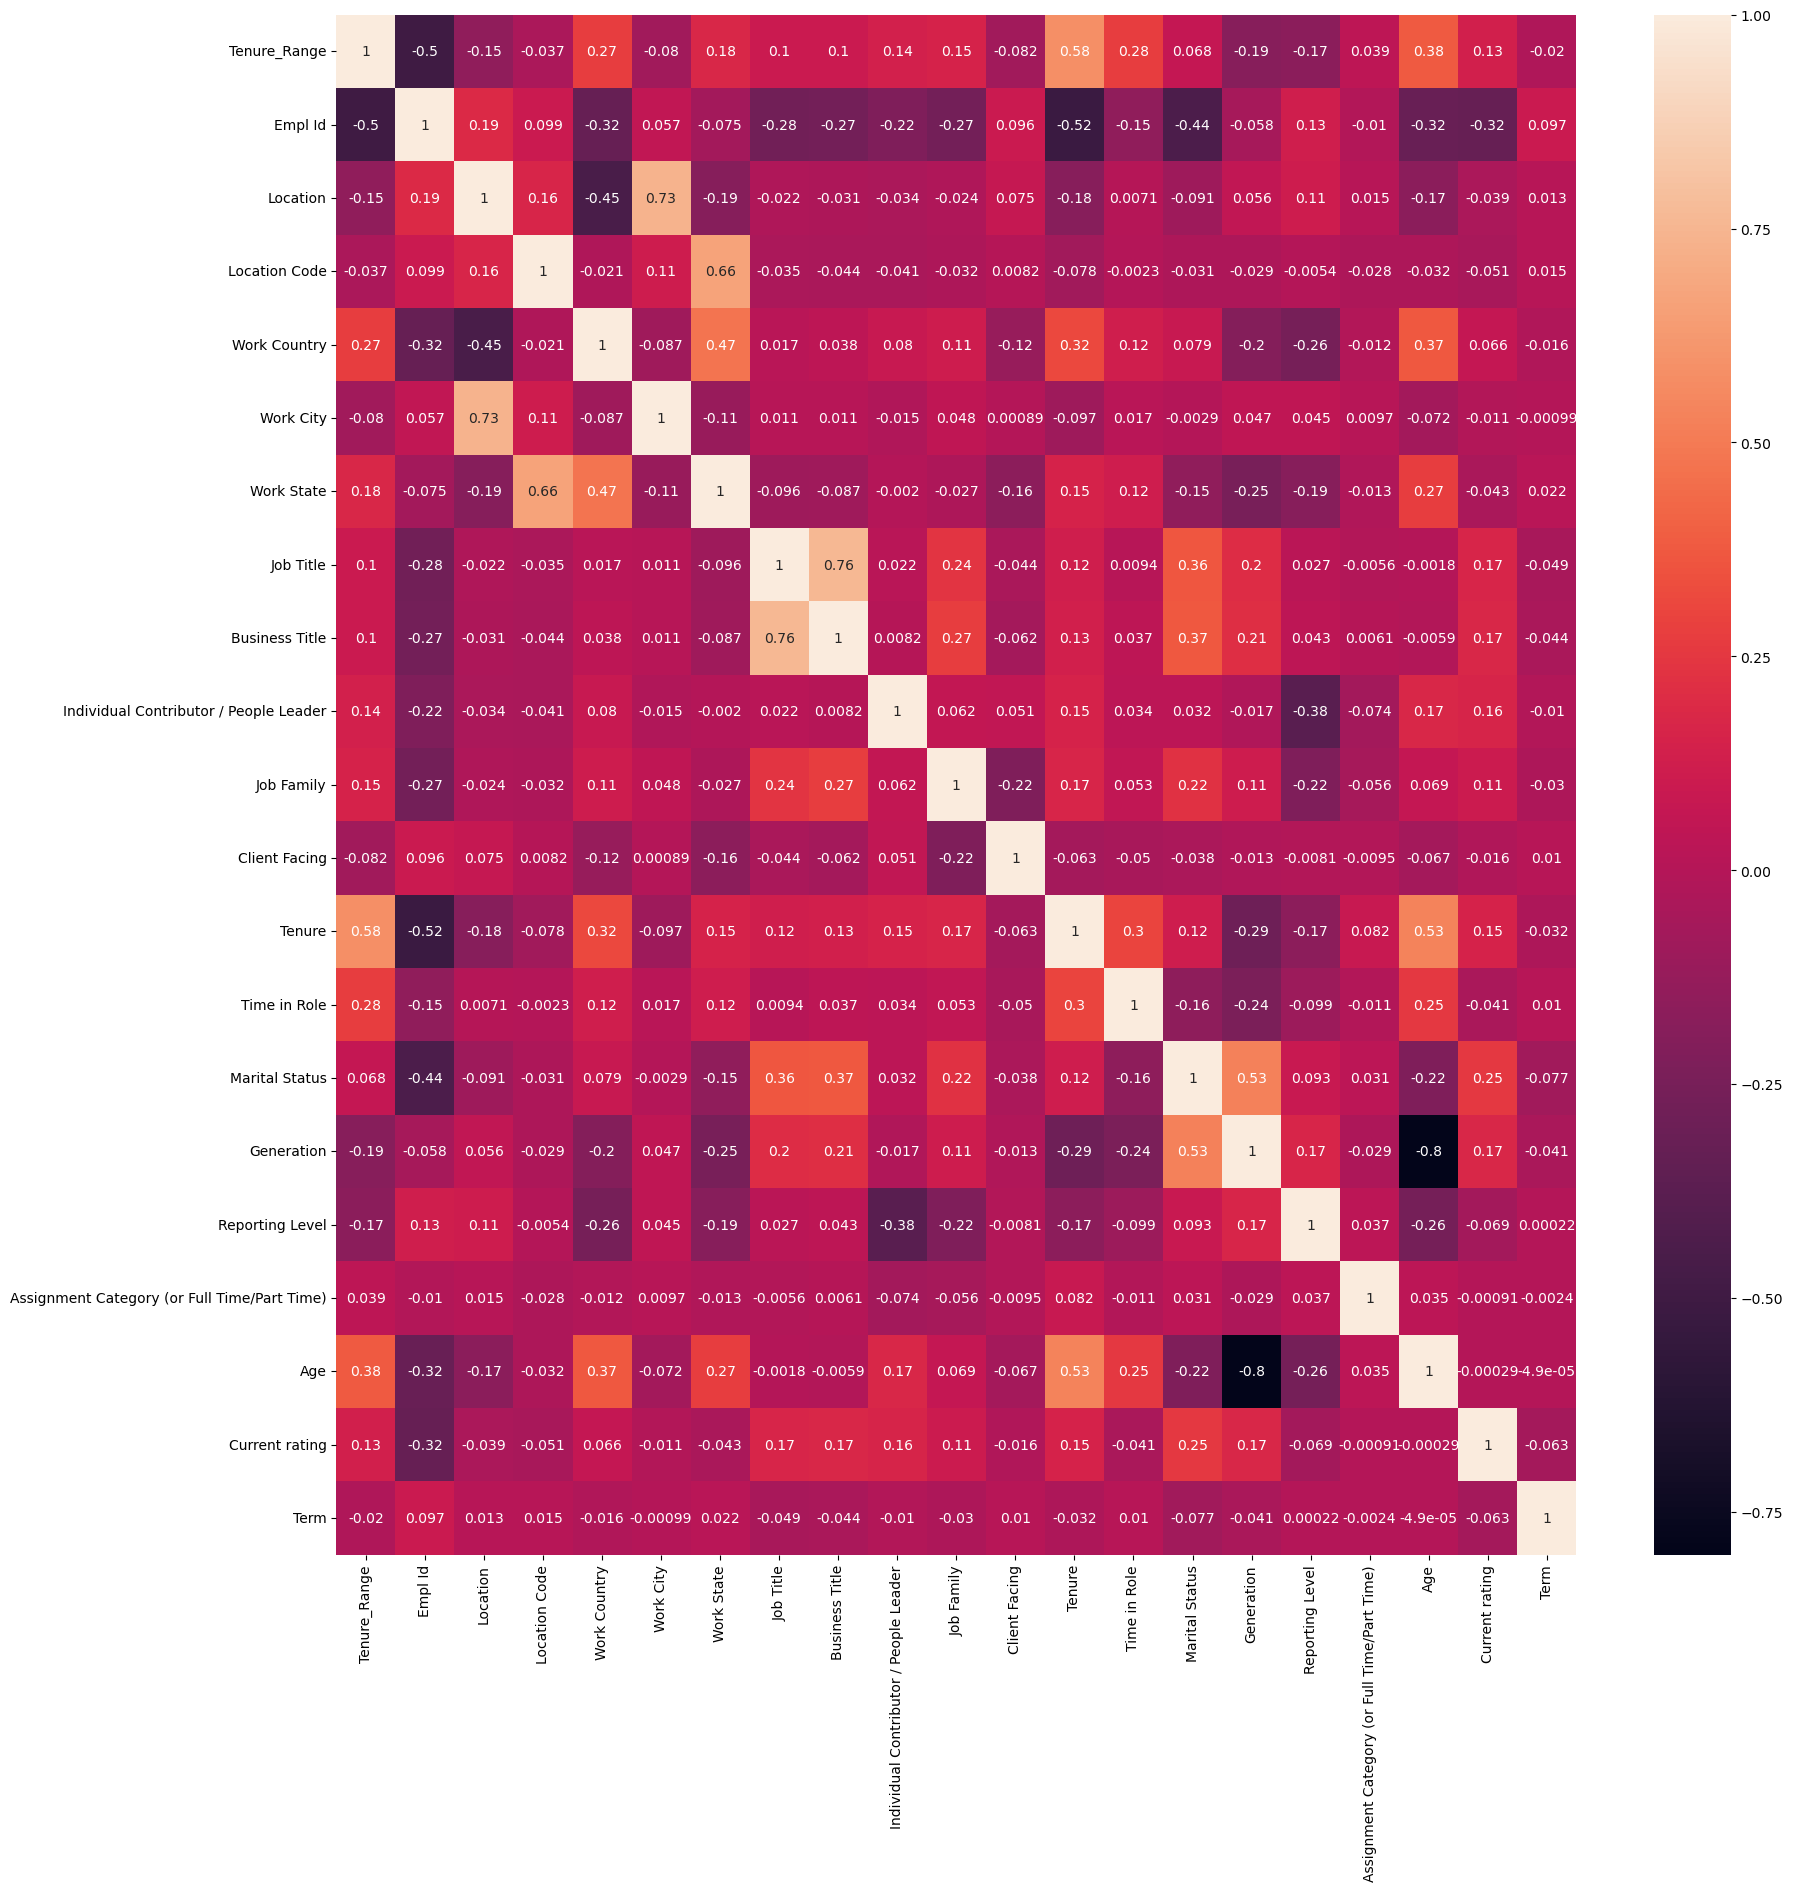

In [69]:
plt.figure(figsize=(20,20))
temp=df[['Tenure_Range', 'Empl Id', 'Location', 'Location Code',
       'Work Country', 'Work City', 'Work State', 'Job Title',
       'Business Title', 'Individual Contributor / People Leader',
       'Job Family', 'Client Facing',
       'Tenure', 'Time in Role', 'Marital Status', 'Generation',
       'Reporting Level', 'Assignment Category (or Full Time/Part Time)',
       'Age', 'Current rating', 'Term']]
sns.heatmap(temp.corr(),annot=True)

In [70]:
def correlate(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j ] > threshold):     
                colname = corr_matrix.columns[i]                
                col_corr.add(colname)
    return col_corr

{'Age', 'Business Title', 'Generation', 'Tenure', 'Work City', 'Work State'}
These column are highly corelated and can lead to overfitting of train data
#### From the heatmap, there is a positive(+) correlation :

##### between 'Age', 'Business Title', 'Generation', 'Tenure', 'Work City', 'Work State'. Which could mean that the employees are in same location can be more highly correlated to each other.

##### For the negative(-) 'Age' and 'Generation' highly correlated. I'm assuming that  if Age is growing more then the new generation with young people will be added more

In [ ]:
drop_col=correlate(temp,0.5)
print(drop_col)

In [ ]:
## drop date column like 'Date','Location','Service Date','Current Hire Date'
col_drop=['Date','Location','Service Date','Current Hire Date']
df.drop(columns=col_drop,axis=1,inplace=True)

## Now check for what factors contributed most to associates leaving the organization 

In [ ]:
df_temp=df_copy.groupby(by='Assignment Category (or Full Time/Part Time)')['Term'].value_counts().reset_index(name='Count')
Total_count=df_temp.groupby('Assignment Category (or Full Time/Part Time)')['Count'].sum()
df_term_No=df_temp[df_temp['Term']=='No'].copy()
df_term_No['percentage']=df_term_No['Count']*100/df_term_No['Assignment Category (or Full Time/Part Time)'].map(Total_count)
df_term_No

- The Full Time Assignments are much larger than pary time  
- A significant portion of both Full time and Part Time are leaving the firm that's shows a major issue with the employees regradless of the Category.


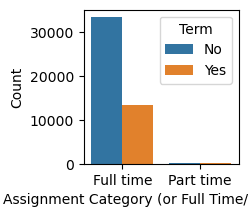

In [71]:
plt.figure(figsize=(2,2))
df_pivot = df_copy.pivot_table(index=['Assignment Category (or Full Time/Part Time)', 'Term'], aggfunc='size').reset_index(name='Count')
sns.barplot(data=df_pivot,x='Assignment Category (or Full Time/Part Time)',y='Count',hue='Term')
plt.show()


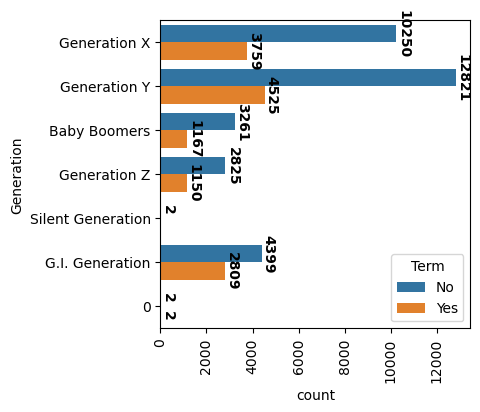

In [72]:
plt.figure(figsize=(4,4))
bars = sns.countplot(data=df_copy, y='Generation', hue='Term', width=0.8, dodge=0.5)
plt.xticks(rotation=90)
for container in bars.containers:
    bars.bar_label(container, label_type='edge', fontweight='bold', color='black',rotation=270)
legend=plt.legend(title='Term',loc='lower right',frameon=True)
plt.show()

- Term No have more consistent trend compared to Yes  
- Generation Y is particularly notable for having the highest counts in both Yes and No categories.

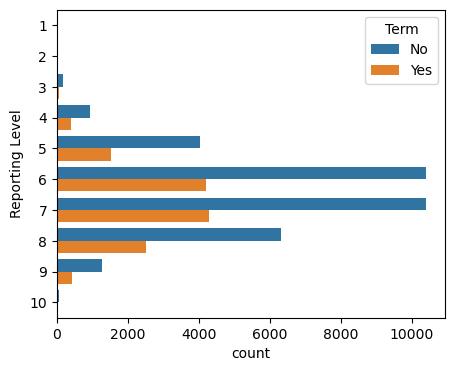

In [73]:
## Check for reporting level
plt.figure(figsize=(5,4))
sns.countplot(data=df_copy,y='Reporting Level',hue='Term')
plt.show()

- This also shows a consistent trend in leaving firm/company than the employee staying in firm.
- This also shows a widespread probelm among the employee.
- The people replorting to level 6 and 7 are the most among those who are leaving the firm and also These two level who have the most current employees 
  perhaps these reporting levels have more resources but their policies didn't allign perfectly with employees.

## Check for work state

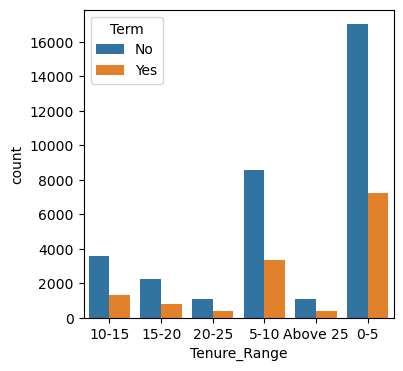

In [74]:
df_copy['Tenure_Range']=np.where(df_copy['Tenure_Range']=='Above','Above 25',df_copy['Tenure_Range'])
plt.figure(figsize=(4,4))
sns.countplot(data=df_copy,x='Tenure_Range',hue='Term')
plt.show()

- 0-5 years of Tenure range associates leaves the organization the most.
-  5-10 years of Tenure range assosciate also likely to leave the organization the most.
- After gaining experience, some employees may look for new opportunities that offer better pay or better align with their personal and professional goals. 

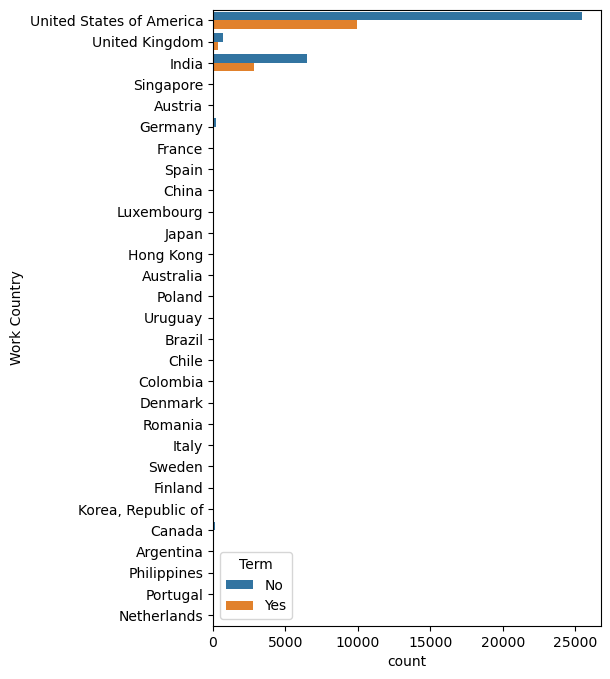

In [75]:
## check for country
plt.figure(figsize=(5,8))
sns.countplot(data=df_copy,y='Work Country',hue='Term')
plt.show()

- It shows maximum employee who joined/leaved the company were from these (USA,UK,India) Three country
Hence the maximum people who leaves are majorly from these three
- Conutry may be the reason to leave.

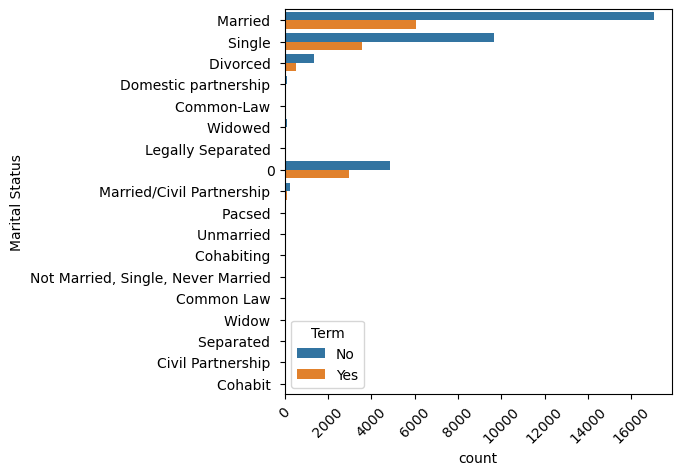

In [35]:
## Check for marital status
plt.figure(figsize=(5,5))
sns.countplot(data=df_copy,y='Marital Status',hue='Term')
plt.xticks(rotation=45)
plt.show()

- It shows Married,Single and Divorced employee, All three are leaving the firm/company in markable amount 
- It won't be good to say the marital status might be a reason to leave,But married employee leaves the most so there is slight possiblities
 that due to tension in marriage they are leaving.

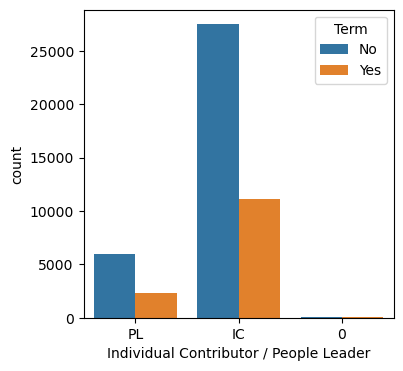

In [36]:
plt.figure(figsize=(4,4))
sns.countplot(data=df_copy,x='Individual Contributor / People Leader',hue='Term')
plt.show()

- individual Contributor were in large number who leaved the firm/company.
This shows that individual Contributor/ People Leader was also among the reasons to leave.
- Perhaps They want to work on something like their own  startup,buisness  

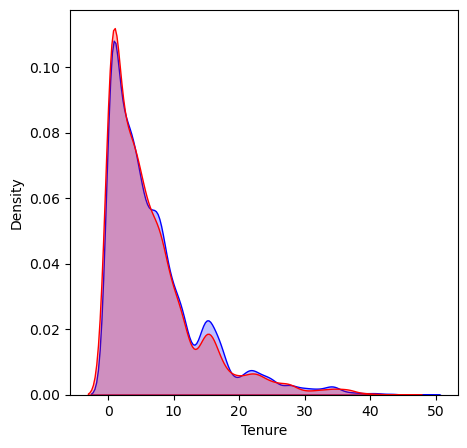

In [37]:
## if we had more info about the tenure can we tell a more direct answer
fig=plt.figure(figsize=(5,5))
ax=sns.kdeplot(data=df_copy[df_copy['Term']=='No']['Tenure'],color='b',fill=True)
ax=sns.kdeplot(data=df_copy[df_copy['Term']=='Yes']['Tenure'],color='r',fill=True)

- Here we can say that most employee who leave the company after serving 0-10 yrs to the company

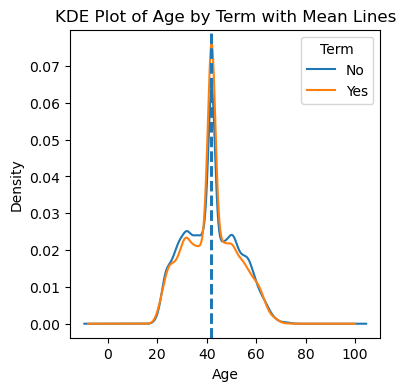

In [38]:
plt.figure(figsize=(4,4))
df_copy.groupby(by='Term')['Age'].plot(kind='kde')
plt.legend()
terms = df_copy['Term'].unique()
for term in terms:
    mean_value = df_copy[df_copy['Term'] == term]['Age'].mean()
    plt.axvline(mean_value, linestyle='--', linewidth=2)

# Customize plot
plt.legend(title='Term')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age by Term with Mean Lines')
plt.show()

- We can see from the above graph that the employee age 40-50 leaves the firm/company the most.
- Since Generation X and Y category employee's age lies between 40-50 age hence they are the most who leaves the firm/company.

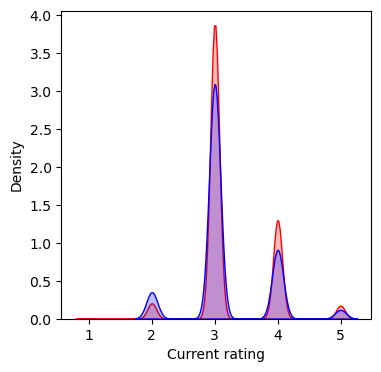

In [39]:
plt.figure(figsize=(4,4))
sns.kdeplot(data=df_copy[df_copy['Term']=='No']['Current rating'],fill=True,color='r')
sns.kdeplot(data=df_copy[df_copy['Term']=='Yes']['Current rating'],fill=True,color='b')
plt.show()

- The employee having the current rating 3(mediocre) were the most among the who leaves the company


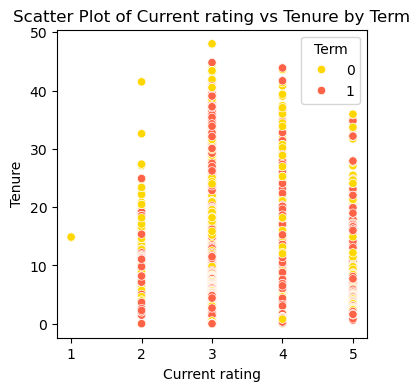

In [40]:
# Scatter plot using sns.scatterplot
plt.figure(figsize=(4,4))
sns.scatterplot(x='Current rating', y='Tenure', hue='Term', data=df, palette=('#FFD700','#FF6347'),markers='o')
plt.title('Scatter Plot of Current rating vs Tenure by Term')
plt.show()

- We can see if the employee having medicre(3) rating and serving long tenure are leaving the company most

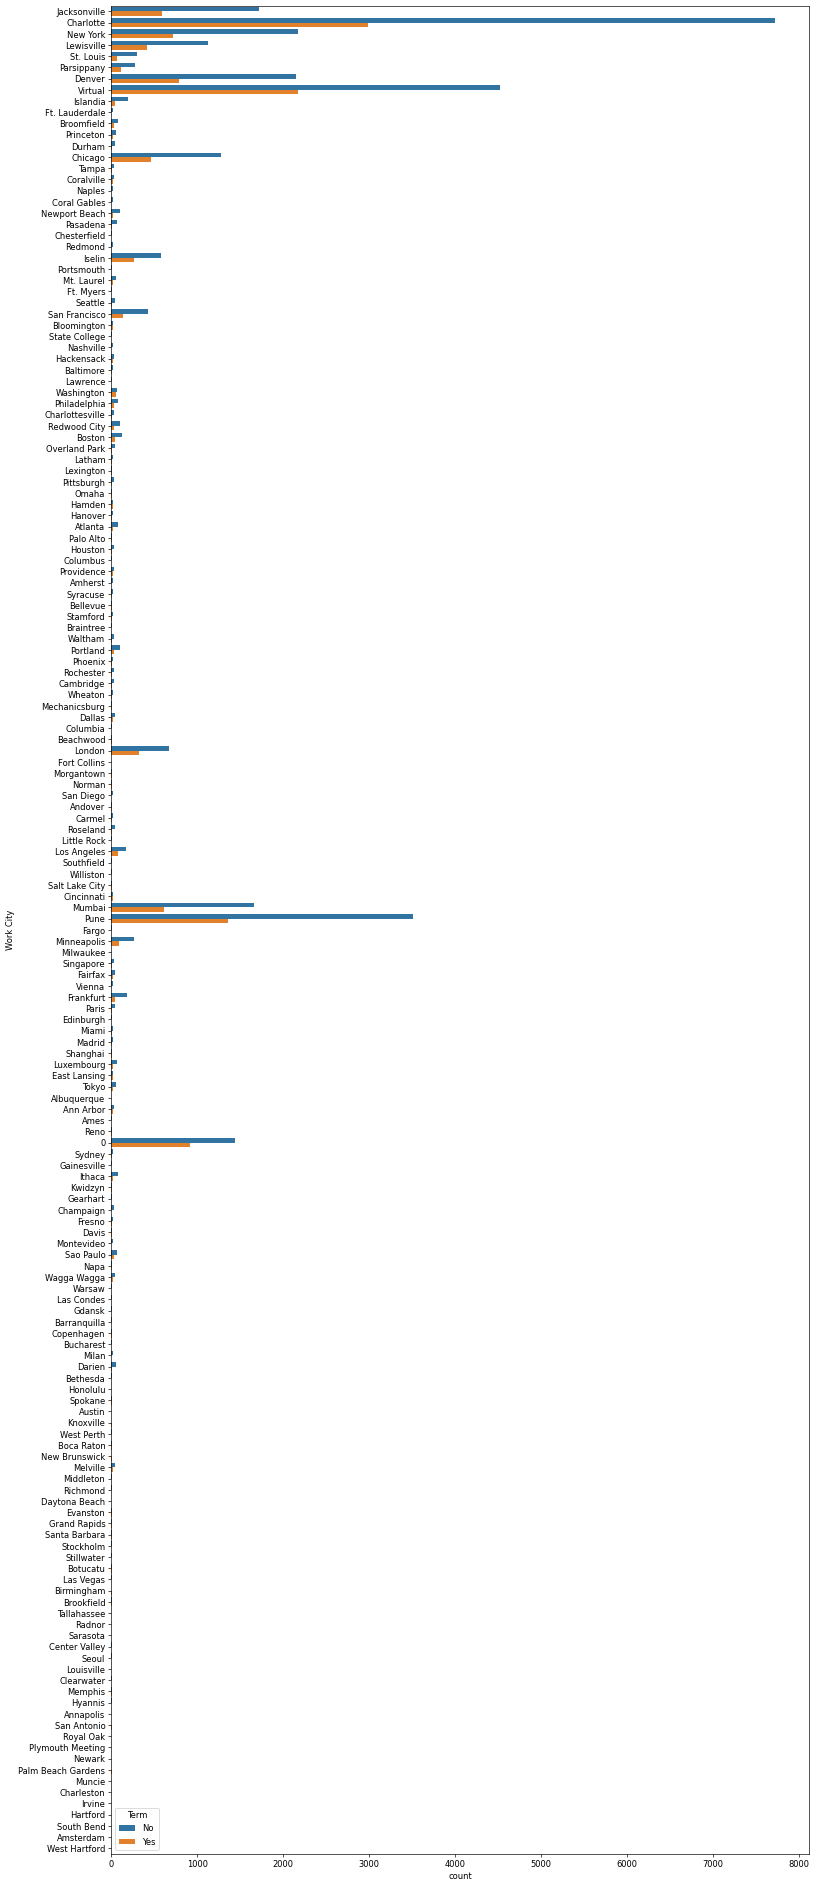

In [46]:
ax = plt.subplots(figsize=(15, 40),dpi=60)
sns.countplot(y="Work City", hue='Term', data=df_copy)
plt.show()

1. Mostly United States of America (City -Charlottes), and India (City - Pune) are the two most major Countries, cities which is having mass increase of leaving the associates. 
2. This shows that Country and Cities were also be one of the main reasons to leave.
3. perhaps the job place was far from their home or they get a remote job

Text(0.5, 1.0, 'Employee Tenure_Range Distribution')

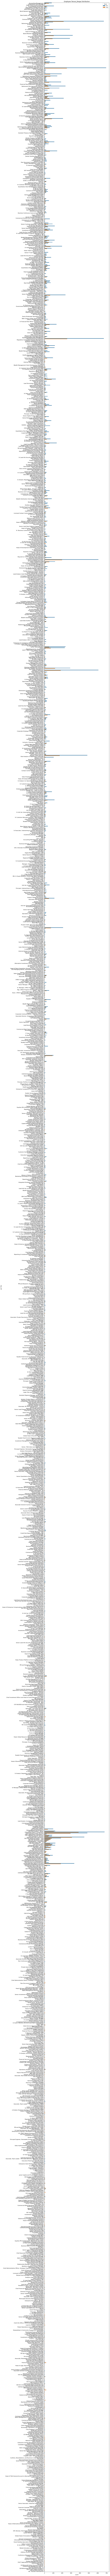

In [41]:
ax = plt.subplots(figsize=(10, 400),dpi=80)
sns.countplot(y="Job Title", hue='Term', data=df_copy).set_title('Employee Tenure_Range Distribution')


1. Mostly CW Variable/Corporate are the two most major Job Titles which is having mass increase of leaving the associates. 
2. This tells us Job Title were also be the major reasons to leave.

In [42]:
temp_employee=df_copy['Term'].value_counts().reset_index(name='Count_of_employee')
temp_employee['percent_leaves']=temp_employee['Count_of_employee']*100/(temp_employee['Count_of_employee'].sum())
temp_employee[['Term','percent_leaves']]

Term  percent_leaves
0   No       71.446819
1  Yes       28.553181

- Approx 71% of the employee have already left the company/firm
and only 29 % of the employee are associated with the company right now

In [43]:
df_summery=df.groupby(by='Term')
df_summery.mean()

Tenure_Range       Empl Id  Location Code  Work Country  Work City  \
Term                                                                       
0         1.515703   9198.176371     141.268087     23.842461  78.859118   
1         1.436997  10427.700641     143.213316     23.633686  78.750224   

      Work State    Job Title  Business Title  \
Term                                            
0      23.271454  1288.683611     1952.204052   
1      24.055547  1204.378840     1834.854086   

      Individual Contributor / People Leader  Job Family  Client Facing  \
Term                                                                      
0                                   1.176222  107.120739       1.798182   
1                                   1.167537  102.934611       1.807859   

        Tenure  Time in Role  Marital Status  Generation  Reporting Level  \
Term                                                                        
0     7.034855      1.743223        9.029917    3.224970         6.611353   
1     6.534085      1.796237        8.245004    3.124963         6.611915   

      Assignment Category (or Full Time/Part Time)        Age  Current rating  
Term                                                                           
0                                         0.004678  41.860965        3.258909  
1                                         0.004324  41.859827        3.177528